In [7]:
import ase
import numpy as np
from ase.visualize import view
import struct_statistics as stats
import matplotlib.pyplot as p
import soaputils as su
#%matplotlib

In [8]:
rCut = 10.0
NradBas = 5
Lmax = 5
myAlphas, myBetas = genBasis.getBasisFunc(rCut, NradBas)

struct_ran = su.gen_struct(70, seed=50)
struct_opt = ase.io.read('res_structs/x0_test/batch0.cfg')

In [12]:
import soaplite
import genBasis
at_ran = soaplite.get_periodic_soap_structure(struct_ran, myAlphas, myBetas, rCut, NradBas, Lmax)
mat_opt = soaplite.get_periodic_soap_structure(struct_opt, myAlphas, myBetas, rCut, NradBas, Lmax)
np.save("res_data/mat_ran",mat_ran)
np.save("res_data/mat_opt",mat_opt)

In [16]:
mat_ran = np.load("res_data/mat_ran.npy")
mat_opt = np.load("res_data/mat_opt.npy")

In [18]:
def display_unit_cell(struct):
    unit_cell = struct.get_cell() 
    positions_in_A = struct.get_positions()
    types = struct.get_chemical_symbols()
    Z = struct.get_atomic_numbers()
    Z[1] = 0
    # dispolay the atom positions:
    p.scatter(positions_in_A[:,0],positions_in_A[:,1],5*Z,Z)
    
    # display the unit cell boundary:
    for j1 in range(3):
        for j2 in range(3):
            if j1 != j2:
                for j3 in range(3):
                    if (j2 != j3) and (j1 != j3):
                        x = [0, unit_cell[j1,0]]+unit_cell[j2,0]+unit_cell[j3,0]
                        y = [0, unit_cell[j1,1]]+unit_cell[j2,1]+unit_cell[j3,1]                        
                    else:
                        x = [0, unit_cell[j1,0]]+unit_cell[j2,0]
                        y = [0, unit_cell[j1,1]]+unit_cell[j2,1]
                    p.plot(x,y,'k')
            else:
                x = [0, unit_cell[j1,0]]
                y = [0, unit_cell[j1,1]]            
                p.plot(x,y,'k')
    p.axis('equal');

70  atoms in a super cell volume of  2333.3333333333303  A^3, area in (001) projection: 10.673659863068764 x 10.673659863068764 A^2



Text(0.5, 1.0, 'aligned unit cell showing just the projection')

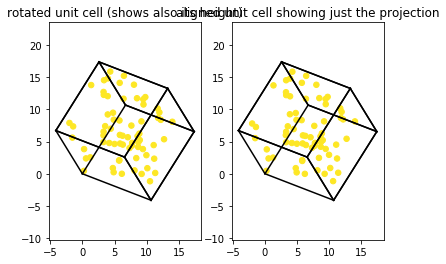

In [21]:
structure = struct_ran
Natom = structure.get_number_of_atoms()
unit_cell_volume =structure.get_volume()
unit_cell = structure.get_cell() 
xRange = unit_cell[0,0]
yRange = unit_cell[1,1]
print(Natom," atoms in a super cell volume of ",unit_cell_volume," A^3, area in (001) projection:",xRange,"x",yRange,"A^2\n")
# rotate the cube to make it look 3D:
#structure.rotate((1, 1, 1), -np.pi / 4, (0,0,0),True)
#structure.rotate(-np.pi / 4,(1,1,1))
p.subplot(1,2,1)
display_unit_cell(structure)
p.title('rotated unit cell (shows also its height)')
# rotate back:
#structure.rotate((1, 1, 1), np.pi / 4, (0,0,0),True)
structure.rotate(np.pi / 4,(1,1,1))
p.subplot(1,2,2)
display_unit_cell(structure)
p.title('aligned unit cell showing just the projection')